In [13]:
source('helpers.R')

In [4]:
merged_CD8CARpos <- readRDS("../../../ProcessedData/seurat/csf_and_ip_cd8s.rds")

In [7]:
muscat.edgeR <- muscat.de.genes(
    seurat_obj = merged_CD8CARpos, 
    cluster_col = 'cell_type', 
    group_col = 'source', 
    sample_col = 'sample_id', 
    method = 'edgeR'
)

protein_coding <- filter_genes_by_biotype(muscat.edgeR$gene, biotype = "protein_coding")
muscat.edgeR <- muscat.edgeR[muscat.edgeR$gene %in%  c(protein_coding$filtered_genes, 'CAR'),]

  |======================================================================| 100%

       Num DE.genes % DE.genes
CD8+ T         4629       12.6


In [10]:
genes.up <- c('KLRK1','KLRC1','IFNG','PDCD1','TIGIT','TNFRSF9','LYST','VCAM1','TOX','DUSP2','CD160','CCL3','CCL4','IL6ST','DDIT4','FASLG','KLRD1','GZMK','GNLY','ITGA1','CXCL13','TOX2','KLRF2')
genes.down = c('CCND2','MAL','CTSH','CISH','SOCS2','CCR7','KLF3','BTBD3', 'SOCS3','LTB','MKI67','CDCA3','TOP2A')

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


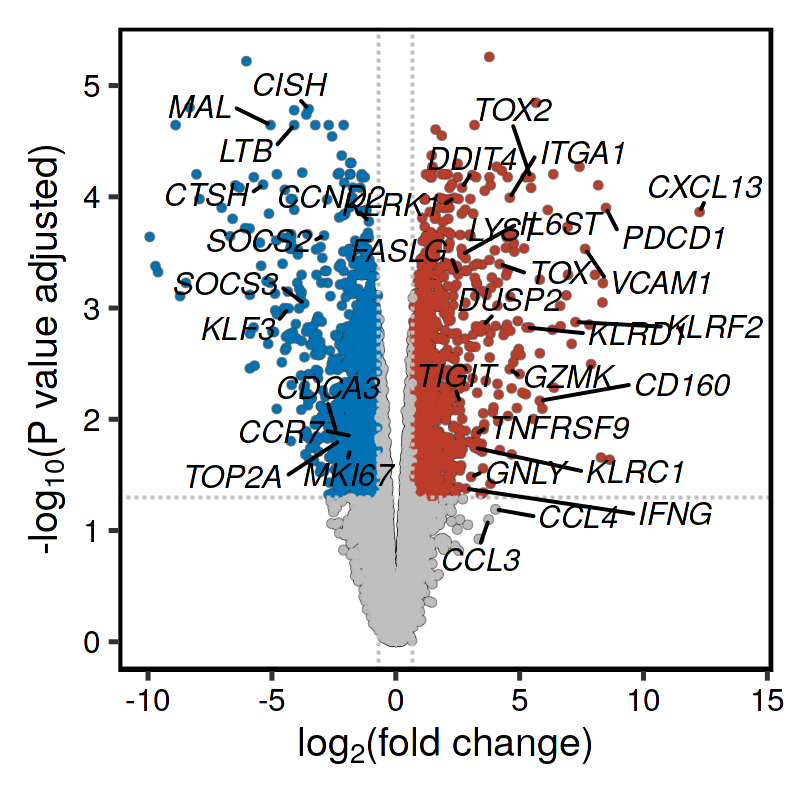

In [22]:
ctype = "CD8+ T"
muscat.edgeR.ctype <- muscat.edgeR %>% 
    filter(cluster_id == ctype) %>% 
    dplyr::select(gene, p_adj.glb, logFC)

rownames(muscat.edgeR.ctype) <- muscat.edgeR.ctype$gene
colnames(muscat.edgeR.ctype) <- c('gene', 'p_val_adj', 'avg_log2FC')

muscat.edgeR.ctype <- muscat.edgeR.ctype %>% dplyr::select(p_val_adj, avg_log2FC)
muscat.edgeR.ctype$avg_log2FC <- muscat.edgeR.ctype$avg_log2FC*-1

options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=200)
p <- do_VolcanoPlot(sample = merged_CD8CARpos, genes.up = genes.up, genes.down = genes.down,
            de_genes = muscat.edgeR.ctype, pt.size=0.6,  min.segment.length=0.01, force=20, nudge_x=1.5,
            pval_cutoff = 0.05,
            FC_cutoff = log(2), n_genes = 20, order_tags_by='custom') + xlim(-10,14)  
p

In [23]:
pdf(file.path(panel.path, paste0("CD8_IP_v_CSF_bytranscript_edger_custom.pdf")), width=4, height=4)
p
dev.off()

pdf 
  2

In [17]:
sig.edgeR.ctype <- subset(muscat.edgeR.ctype, p_val_adj < 0.05)

In [18]:
gsea_res <- RunGSEA(geneID = rownames(sig.edgeR.ctype), geneScore = sig.edgeR.ctype$avg_log2FC, db = "GO_BP",)

[2025-05-04 00:27:29.632574] Start GSEA

Workers: 14

Species: Homo_sapiens

Loading cached db: GO_BP version:3.18.0 nterm:15709 created:2025-01-20 19:40:54.298262

Permform GSEA...



  |                                                                      |   0%

  |======================================================================| 100%





  |======================================================================| 100%



[2025-05-04 00:28:06.601997] GSEA done

Elapsed time:36.97 secs



In [19]:
go_bp_ids <- c(
  "GO:1990869",  # Cellular response to chemokine
  "GO:1990868",  # Response to chemokine
  "GO:0070098",  # Chemokine-mediated signaling pathway
  "GO:2000401",  # Regulation of lymphocyte migration
  "GO:0098542",  # Defense response to other organism
  "GO:1903047",  # Mitotic cell cycle process
  "GO:0007059",  # Chromosome segregation
  "GO:0048285",  # Organelle fission
  "GO:0140014",  # Mitotic nuclear division
  "GO:0000280"   # Nuclear division
)


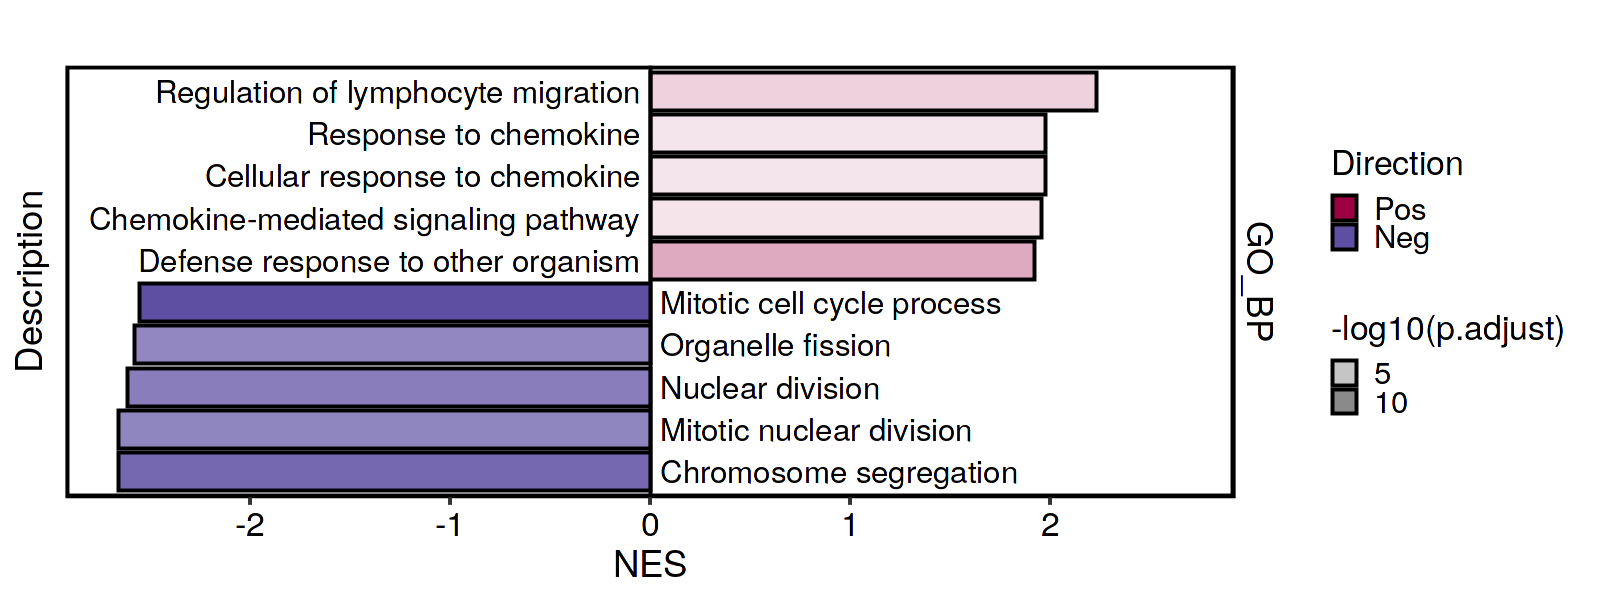

In [24]:
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=200)
p <- GSEAPlot(srt = NULL, res = gsea_res, db = "GO_BP", plot_type = "bar", topTerm = 10, direction = "both", id_use=go_bp_ids)
p

In [25]:
pdf(file.path(panel.path, paste0("CD8_IP_v_CSF_bytranscript_GSEA_bar.pdf")), width=8, height=3)
p
dev.off()

pdf 
  2